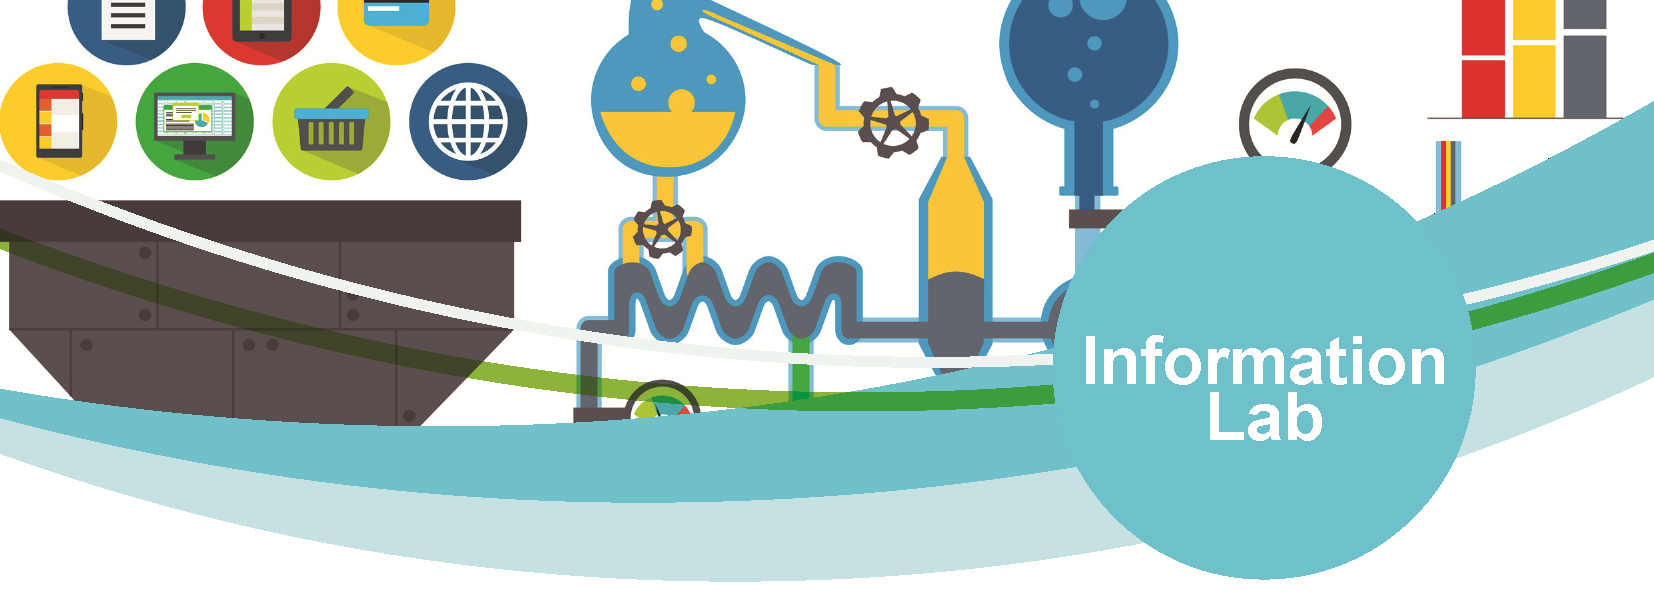

<h1>Python Plots - Ranking</h1>

Examples of graphs used for Ranking using the MatplotLib and Seaborn Python Packages.

Prepared by: Lee Matthews <br>

Source Material: <br>
https://www.machinelearningplus.com/plots/top-50-matplotlib-visualizations-the-master-plots-python/

Data Dictionaries: <br>
https://ggplot2.tidyverse.org/reference/mpg.html<br>
https://www.gapminder.org/data/documentation/gd001/<br>


In [1]:
# Setup - Limited parts needed per plot.


import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.filterwarnings(action='once')

large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'figure.figsize': (16, 10),
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large}
plt.rcParams.update(params)
plt.style.use('seaborn-whitegrid')
sns.set_style("white")
%matplotlib inline

# Version
print(mpl.__version__)  #> 3.0.0
print(sns.__version__)  #> 0.9.0

2.0.2
0.7.1


To run the code below you will need to map //finbilab01/COP_Repo to a lettered drive (I have used E:) as shown in the images below or alternatively download the data to your local drive and repoint the code to find them.

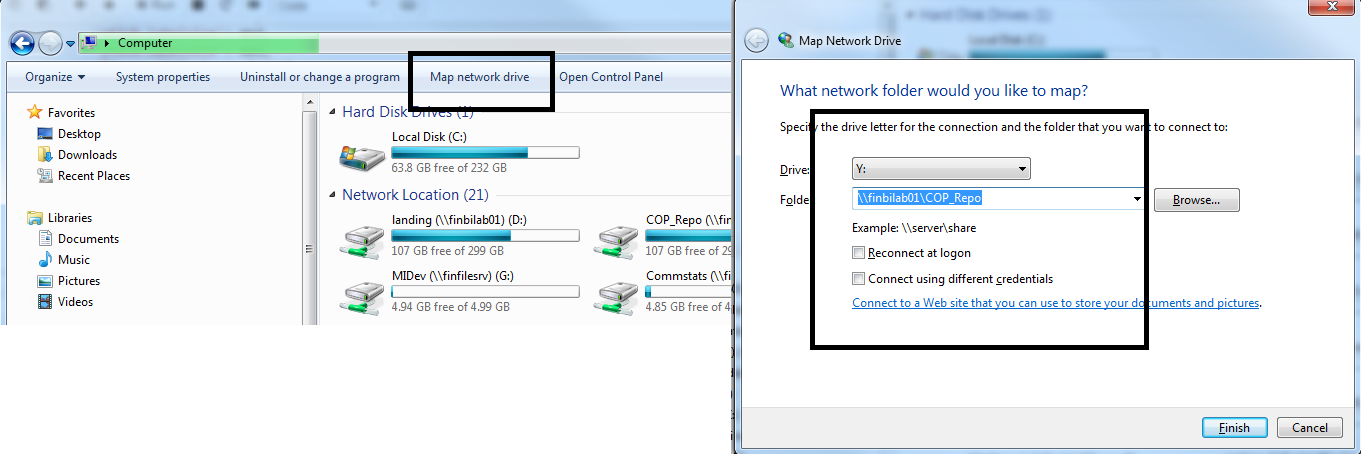

In [3]:
# Import Global Datasets - Datasets are stored in //finbilab01/COP_Repo/Code_Cache/Python/Datasets

df_raw = pd.read_csv("j:/Code_Cache/Python/Datasets/mpg_ggplot2.csv")
gdp = pd.read_csv("j:/Code_Cache/Python/Datasets/gdppercap.csv")
health = pd.read_csv("j:/Code_Cache/Python/Datasets/health.csv")

In [4]:
# Check that the mpg_ggplot2 data has loaded correctly
df_raw.head(10)

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,class
0,audi,a4,1.8,1999,4,auto(l5),f,18,29,p,compact
1,audi,a4,1.8,1999,4,manual(m5),f,21,29,p,compact
2,audi,a4,2.0,2008,4,manual(m6),f,20,31,p,compact
3,audi,a4,2.0,2008,4,auto(av),f,21,30,p,compact
4,audi,a4,2.8,1999,6,auto(l5),f,16,26,p,compact
5,audi,a4,2.8,1999,6,manual(m5),f,18,26,p,compact
6,audi,a4,3.1,2008,6,auto(av),f,18,27,p,compact
7,audi,a4 quattro,1.8,1999,4,manual(m5),4,18,26,p,compact
8,audi,a4 quattro,1.8,1999,4,auto(l5),4,16,25,p,compact
9,audi,a4 quattro,2.0,2008,4,manual(m6),4,20,28,p,compact


In [6]:
# Check the GDP file has loaded correctly
gdp.head(2)

,continent,1952,1957
0,Africa,1252.572466,1385.236062
1,Americas,4079.062552,4616.043733


In [7]:
# Check the health files has loaded correctly
health.head(3)

,Area,pct_2014,pct_2013
0,Houston,0.19,0.22
1,Miami,0.19,0.24
2,Dallas,0.18,0.21


<h2>1. Ordered Bar Chart

__Ordered bar chart__ conveys the rank order of the items effectively. But adding the value of the metric above the chart, the user gets the precise information from the chart itself.

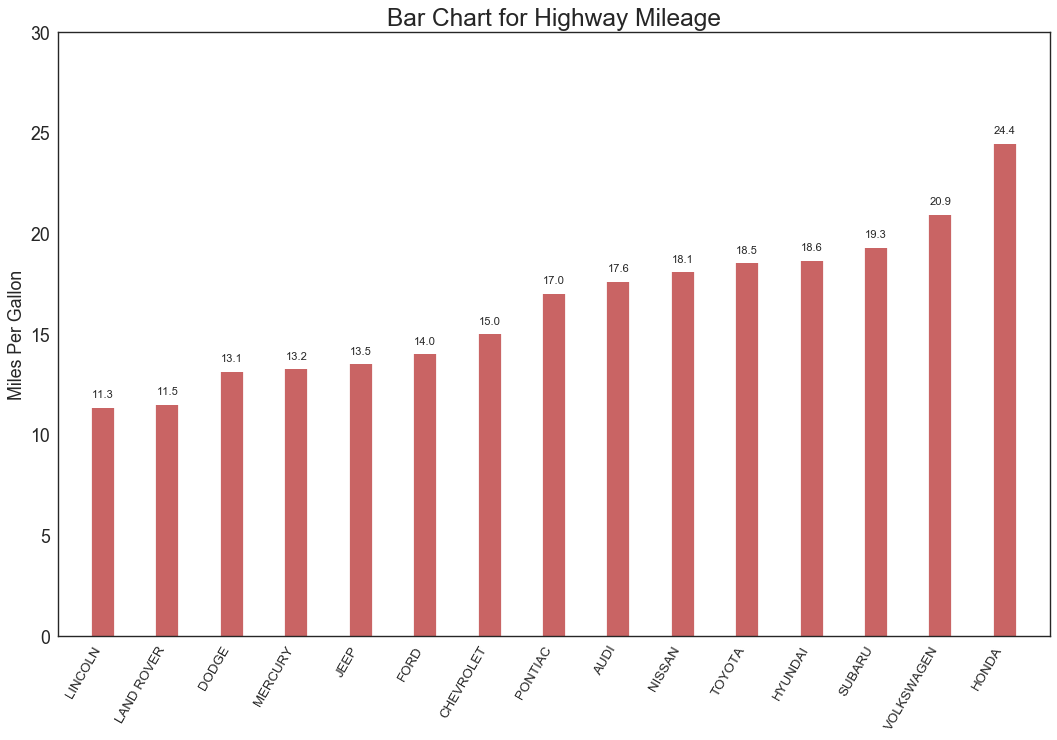

In [8]:
# Prepare Data
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
import matplotlib.patches as patches

fig, ax = plt.subplots(figsize=(16,10), facecolor='white', dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=20)

# Annotate Text
for i, cty in enumerate(df.cty):
    ax.text(i, cty+0.5, round(cty, 1), horizontalalignment='center')


# Title, Label, Ticks and Ylim
ax.set_title('Bar Chart for Highway Mileage', fontdict={'size':22})
ax.set(ylabel='Miles Per Gallon', ylim=(0, 30))
plt.xticks(df.index, df.manufacturer.str.upper(), rotation=60, horizontalalignment='right', fontsize=12)
plt.show()

<h2>2. Lollipop Chart

__Lollipop chart__ serves a similar purpose as a _ordered bar chart_ in a visually pleasing way.

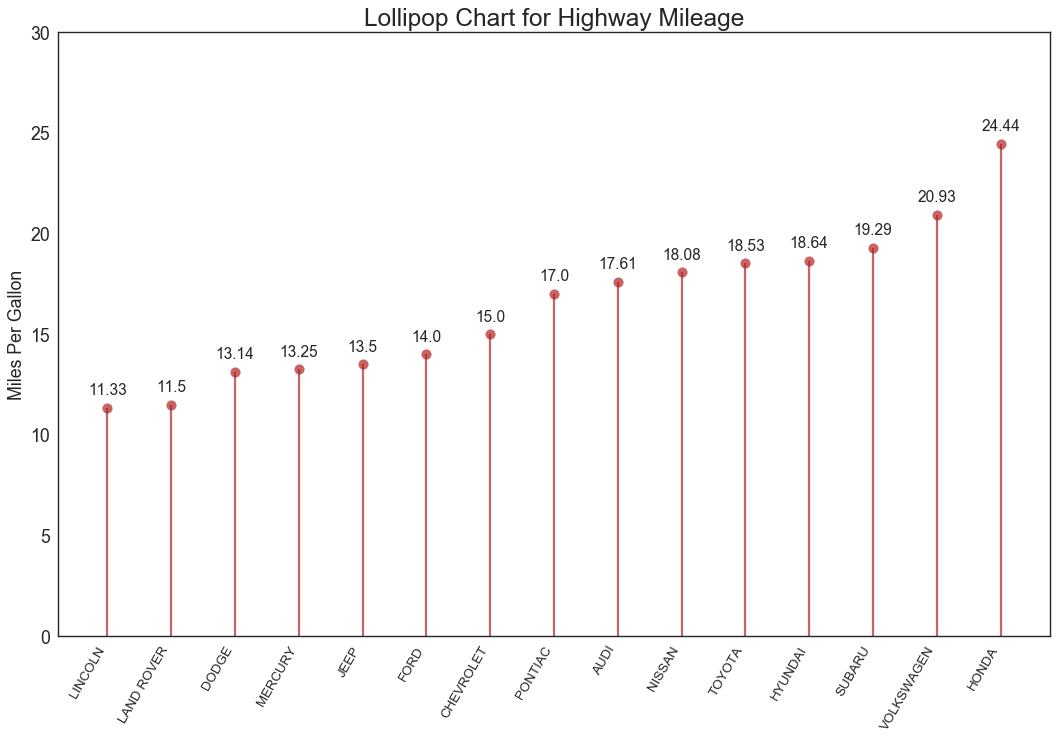

In [9]:
# Prepare Data
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.vlines(x=df.index, ymin=0, ymax=df.cty, color='firebrick', alpha=0.7, linewidth=2)
ax.scatter(x=df.index, y=df.cty, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Lollipop Chart for Highway Mileage', fontdict={'size':22})
ax.set_ylabel('Miles Per Gallon')
ax.set_xticks(df.index)
ax.set_xticklabels(df.manufacturer.str.upper(), rotation=60, fontdict={'horizontalalignment': 'right', 'size':12})
ax.set_ylim(0, 30)

# Annotate
for row in df.itertuples():
    ax.text(row.Index, row.cty+.5, s=round(row.cty, 2), horizontalalignment= 'center', verticalalignment='bottom', fontsize=14)

plt.show() 

<h2>3. Dot Plot

The __dot plot__ conveys the rank order of the items. And since it is aligned along the horizontal axis, you can visualize how far the points are from each other more easily.

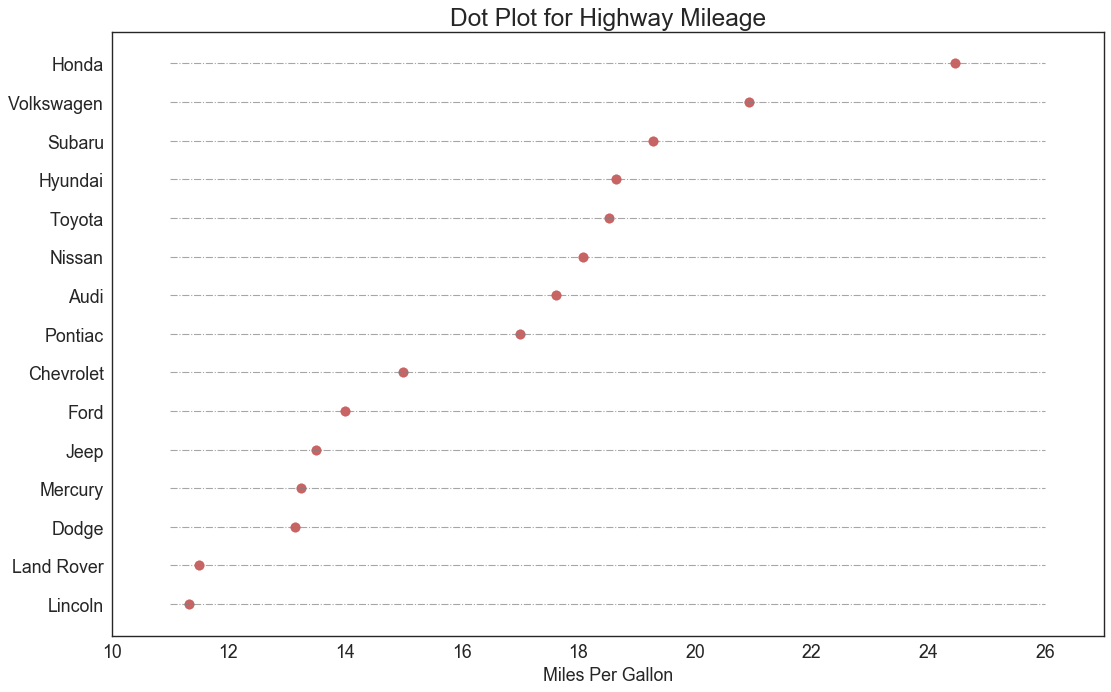

In [10]:
# Prepare Data
df = df_raw[['cty', 'manufacturer']].groupby('manufacturer').apply(lambda x: x.mean())
df.sort_values('cty', inplace=True)
df.reset_index(inplace=True)

# Draw plot
fig, ax = plt.subplots(figsize=(16,10), dpi= 80)
ax.hlines(y=df.index, xmin=11, xmax=26, color='gray', alpha=0.7, linewidth=1, linestyles='dashdot')
ax.scatter(y=df.index, x=df.cty, s=75, color='firebrick', alpha=0.7)

# Title, Label, Ticks and Ylim
ax.set_title('Dot Plot for Highway Mileage', fontdict={'size':22})
ax.set_xlabel('Miles Per Gallon')
ax.set_yticks(df.index)
ax.set_yticklabels(df.manufacturer.str.title(), fontdict={'horizontalalignment': 'right'})
ax.set_xlim(10, 27)
plt.show()

<h2>4. Slope Chart

__Slope chart__ is most suitable for comparing the ‘Before’ and ‘After’ positions of a given person/item

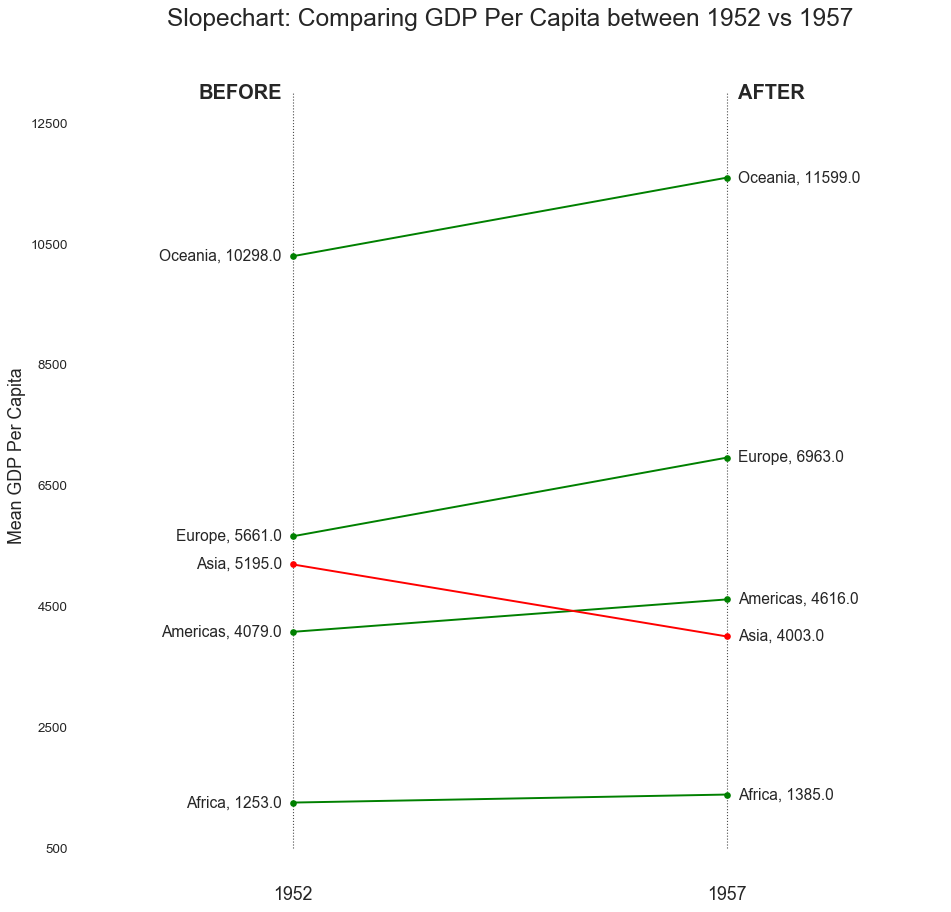

In [11]:
import matplotlib.lines as mlines
# Import Data
left_label = [str(c) + ', '+ str(round(y)) for c, y in zip(gdp.continent, gdp['1952'])]
right_label = [str(c) + ', '+ str(round(y)) for c, y in zip(gdp.continent, gdp['1957'])]
klass = ['red' if (y1-y2) < 0 else 'green' for y1, y2 in zip(gdp['1952'], gdp['1957'])]

# draw line
# https://stackoverflow.com/questions/36470343/how-to-draw-a-line-with-matplotlib/36479941
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='red' if p1[1]-p2[1] > 0 else 'green', marker='o', markersize=6)
    ax.add_line(l)
    return l

fig, ax = plt.subplots(1,1,figsize=(14,14), dpi= 80)

# Vertical Lines
ax.vlines(x=1, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')
ax.vlines(x=3, ymin=500, ymax=13000, color='black', alpha=0.7, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=gdp['1952'], x=np.repeat(1, gdp.shape[0]), s=10, color='black', alpha=0.7)
ax.scatter(y=gdp['1957'], x=np.repeat(3, gdp.shape[0]), s=10, color='black', alpha=0.7)

# Line Segmentsand Annotation
for p1, p2, c in zip(gdp['1952'], gdp['1957'], gdp['continent']):
    newline([1,p1], [3,p2])
    ax.text(1-0.05, p1, c + ', ' + str(round(p1)), horizontalalignment='right', verticalalignment='center', fontdict={'size':14})
    ax.text(3+0.05, p2, c + ', ' + str(round(p2)), horizontalalignment='left', verticalalignment='center', fontdict={'size':14})

# 'Before' and 'After' Annotations
ax.text(1-0.05, 13000, 'BEFORE', horizontalalignment='right', verticalalignment='center', fontdict={'size':18, 'weight':700})
ax.text(3+0.05, 13000, 'AFTER', horizontalalignment='left', verticalalignment='center', fontdict={'size':18, 'weight':700})

# Decoration
ax.set_title("Slopechart: Comparing GDP Per Capita between 1952 vs 1957", fontdict={'size':22})
ax.set(xlim=(0,4), ylim=(0,14000), ylabel='Mean GDP Per Capita')
ax.set_xticks([1,3])
ax.set_xticklabels(["1952", "1957"])
plt.yticks(np.arange(500, 13000, 2000), fontsize=12)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.0)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.0)
plt.show()

<h2>5. Dumbbell Plot

__Dumbbell plot__ conveys the ‘before’ and ‘after’ positions of various items along with the rank ordering of the items. Its very useful if you want to visualize the effect of a particular project / initiative on different objects.

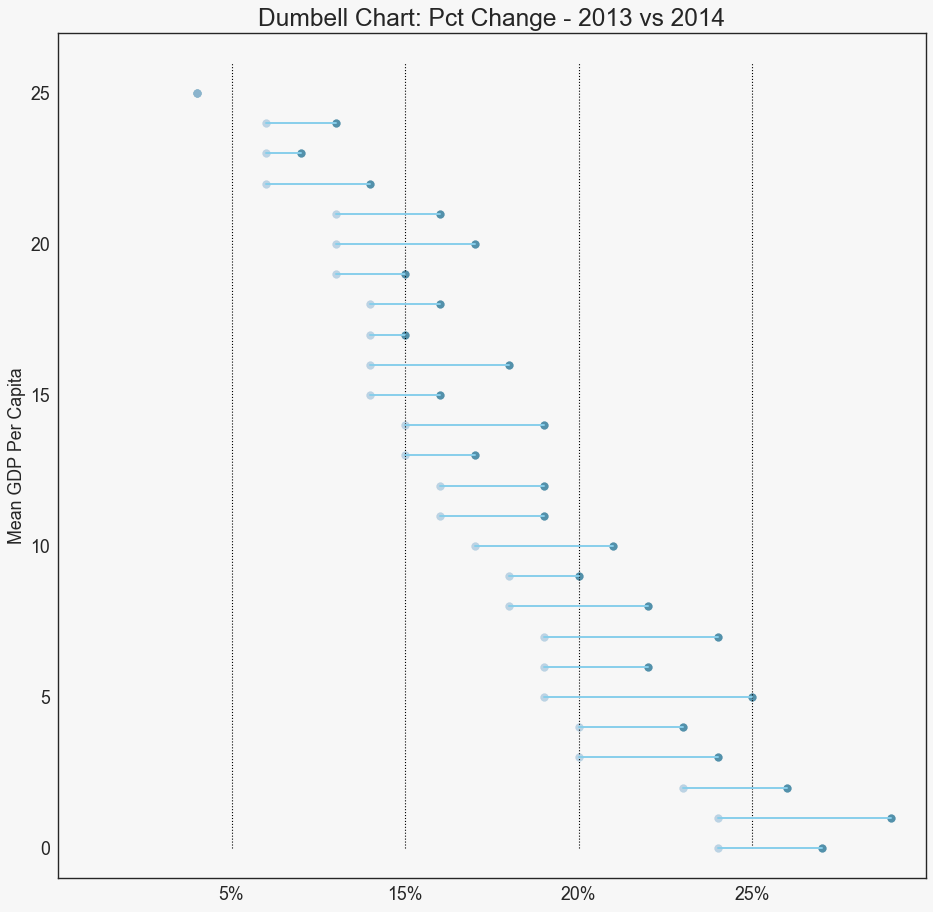

In [12]:
import matplotlib.lines as mlines

# Import Data
health.sort_values('pct_2014', inplace=True)
health.reset_index(inplace=True)

# Func to draw line segment
def newline(p1, p2, color='black'):
    ax = plt.gca()
    l = mlines.Line2D([p1[0],p2[0]], [p1[1],p2[1]], color='skyblue')
    ax.add_line(l)
    return l

# Figure and Axes
fig, ax = plt.subplots(1,1,figsize=(14,14), facecolor='#f7f7f7', dpi= 80)

# Vertical Lines
ax.vlines(x=.05, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.10, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.15, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')
ax.vlines(x=.20, ymin=0, ymax=26, color='black', alpha=1, linewidth=1, linestyles='dotted')

# Points
ax.scatter(y=health['index'], x=health['pct_2013'], s=50, color='#0e668b', alpha=0.7)
ax.scatter(y=health['index'], x=health['pct_2014'], s=50, color='#a3c4dc', alpha=0.7)

# Line Segments
for i, p1, p2 in zip(health['index'], health['pct_2013'], health['pct_2014']):
    newline([p1, i], [p2, i])

# Decoration
ax.set_facecolor('#f7f7f7')
ax.set_title("Dumbell Chart: Pct Change - 2013 vs 2014", fontdict={'size':22})
ax.set(xlim=(0,.25), ylim=(-1, 27), ylabel='Mean GDP Per Capita')
ax.set_xticks([.05, .1, .15, .20])
ax.set_xticklabels(['5%', '15%', '20%', '25%'])
ax.set_xticklabels(['5%', '15%', '20%', '25%'])    
plt.show()